In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [3]:
class K_Means:
  def __init__(self, n_clusters = 2, max_iterations = 100):
    self.n_clusters = n_clusters
    self.max_iterations = max_iterations
    self.centroids = None

  def fit_predict(self, X):
    rand_idx = random.sample(range(0, X.shape[0]), self.n_clusters)
    self.centroids = X[rand_idx]

    for i in range(self.max_iterations):
      # Assign Clusters
      cluster_group = self.assign_clusters(X)  # will return a value like [0,1,0,1,1]

      # Move Centroids
      old_centroids = self.centroids
      self.centroids = self.move_centroids(X, cluster_group)

      # Check completion
      if (old_centroids == self.centroids).all(  ):
        break
    return cluster_group

  def assign_clusters(self, X):
    cluster_group = []
    distances = []

    for row in X:
      for centroid in self.centroids:
        distance = np.sqrt(np.dot(row - centroid, row - centroid))
        distances.append(distance)
      cluster_group.append(np.argmin(distances))
      distances = []
    return np.array(cluster_group)

  def move_centroids(self, X, cluster_group):
    new_centroids = []
    cluster_type = np.unique(cluster_group)

    for type in cluster_type:
      new_centroids.append(X[cluster_group == type].mean(axis = 0))

    return np.array(new_centroids)


In [4]:
df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


Data Standardization

In [6]:
ss = StandardScaler()
df[['Age Standardized']] = ss.fit_transform(df[['Age']])
df[['Annual Income Standardized']] = ss.fit_transform(df[['Annual Income (k$)']])
df[['Spending Score (1-100) Standardized']] = ss.fit_transform(df[['Spending Score (1-100)']])
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age Standardized,Annual Income Standardized,Spending Score (1-100) Standardized
0,1,1,19,15,39,-1.424569,-1.738999,-0.434801
1,2,1,21,15,81,-1.281035,-1.738999,1.195704
2,3,0,20,16,6,-1.352802,-1.700830,-1.715913
3,4,0,23,16,77,-1.137502,-1.700830,1.040418
4,5,0,31,17,40,-0.563369,-1.662660,-0.395980


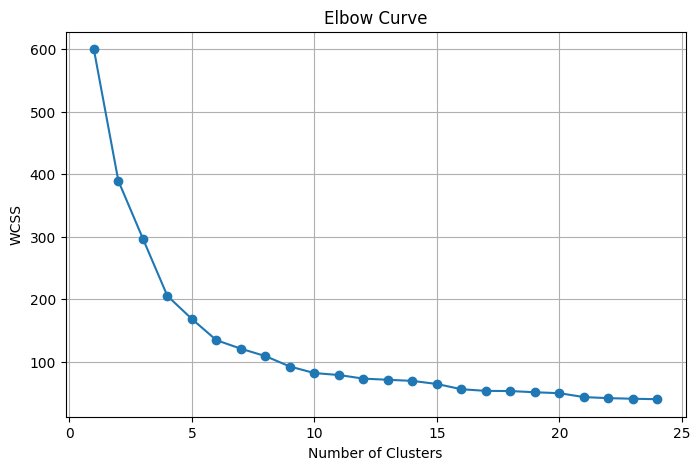

In [7]:
df_clean = df[['Age Standardized', 'Annual Income Standardized', 'Spending Score (1-100) Standardized']]
scaler = StandardScaler()
X = scaler.fit_transform(df_clean)

# Calculate WCSS for different numbers of clusters
wcss = []
for i in range(1, 25):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=6)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 25), wcss, marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

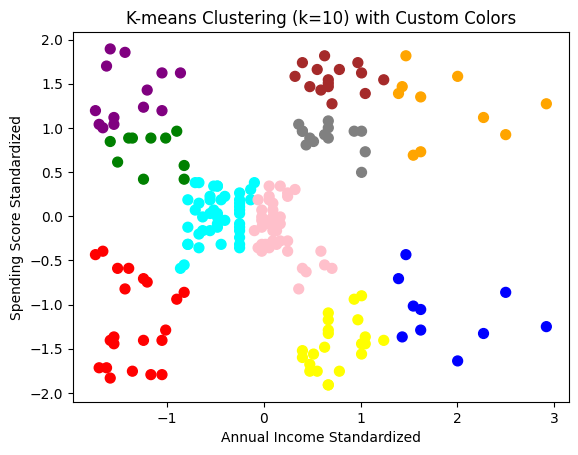

In [15]:
# According to the elbow curve k = 10 seems like a good value of clusters so we'll go ahead with that

X = df[['Annual Income Standardized', 'Spending Score (1-100) Standardized']].values
kmeans = K_Means(n_clusters=10, max_iterations=1000)
df['Clusters'] = kmeans.fit_predict(X)

# Define custom colors for each cluster
colors = ['red', 'blue', 'green', 'yellow', 'purple', 'orange', 'pink', 'brown', 'gray', 'cyan']
plt.scatter(df['Annual Income Standardized'], df['Spending Score (1-100) Standardized'], c=df['Clusters'].apply(lambda x: colors[x % len(colors)]), s=50)
plt.xlabel('Annual Income Standardized')
plt.ylabel('Spending Score Standardized')
plt.title('K-means Clustering (k=10) with Custom Colors')
plt.show()